**This notebook will be dedicated to the training and optimization activities of an XGBoost regression model**

In [1]:
from src import data_utils, preprocessing
import matplotlib.pyplot as plt
import numpy as np

Only run the cell below by removing the # symbol if you haven't downloaded the zones data

In [2]:
# run this cell to download the required data files containing the trip and zones information

# data_utils.download_zones_data('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip')

In [2]:
# first we get our cleaned data set
df_og = data_utils.clean_trip_data('yellow_tripdata_2022-05.parquet')
# now we get our X, and ys
X, y_travel_time, y_fare_amount = data_utils.get_feature_target(df_og)

In [3]:
df_og['month'].min()

5

In [4]:
column_names_order = ['passenger_count','PULocationID','DOLocationID','improvement_surcharge','congestion_surcharge','airport_fee','day','month','is_weekend','distance_between_zones','morning','afternoon','night']

In [5]:
# and we then get our training and testing sets
# we are going to get two sets of y labels, one for travel_time and another for fare_amount
X_train, X_test, y_train_travel_time, y_test_travel_time, y_train_fare_amount, y_test_fare_amount = data_utils.get_train_test_sets(X, y_travel_time, y_fare_amount)

In [6]:
# we can further split the training set into training and validation
X_train, X_val, y_train_travel_time, y_val_travel_time, y_train_fare_amount, y_val_fare_amount = data_utils.get_train_test_sets(X_train, y_train_travel_time, y_train_fare_amount)

In [7]:
# now using the training, validation, and testing sets we can preprocess our data
X_train, X_val, X_test = preprocessing.preprocess_data(X_train, X_val, X_test)

Input train data shape:  (1978236, 11)
Input val data shape:  (494559, 11)
Input test data shape:  (618199, 11) 



**Initial results with no finetuning**

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [9]:
# initial run with no finetuning for fare amount
# fa = fare amount
xg_fa = XGBRegressor(seed=42)
xg_fa.fit(X_train,y_train_fare_amount)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
preds_fa = xg_fa.predict(X_val)

In [11]:
# measure our results
r2_fare = r2_score(y_val_fare_amount, preds_fa)
mae = mean_absolute_error(y_val_fare_amount, preds_fa)
rmse = root_mean_squared_error(y_val_fare_amount, preds_fa)
# agregar r2
print(f'R2 score: {r2_fare}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.9226571729969153
Mean Absolute Error: 2.04212620843454
Root Mean Squared Error: 3.411178291156522


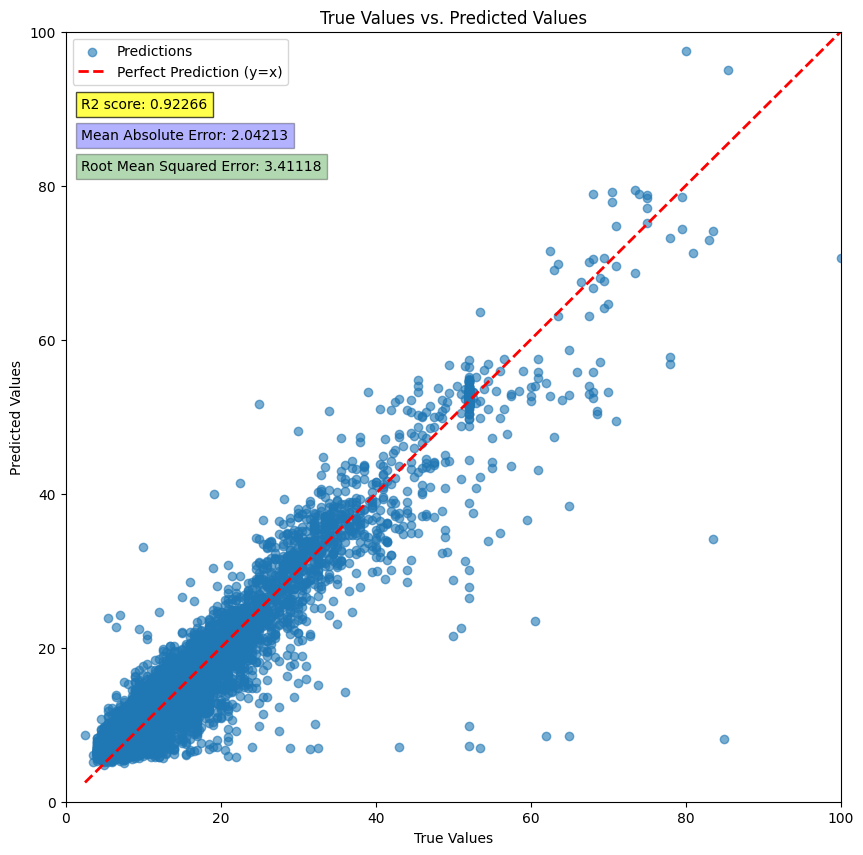

In [12]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_val_fare_amount[:10000], preds_fa[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,100])
plt.ylim([0,100])
#plotting perfect line
min_val = min(np.min(y_val_fare_amount), np.min(preds_fa))
max_val = max(np.max(y_val_fare_amount), np.max(preds_fa))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
#plt.grid(True)
plt.legend()
plt.text(2,90,f'R2 score: {r2_fare:.5f}',bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(2,86,f'Mean Absolute Error: {mae:.5f}',bbox=dict(facecolor='blue', alpha=0.3))
plt.text(2,82,f'Root Mean Squared Error: {rmse:.5f}',bbox=dict(facecolor='green', alpha=0.3))
plt.show()

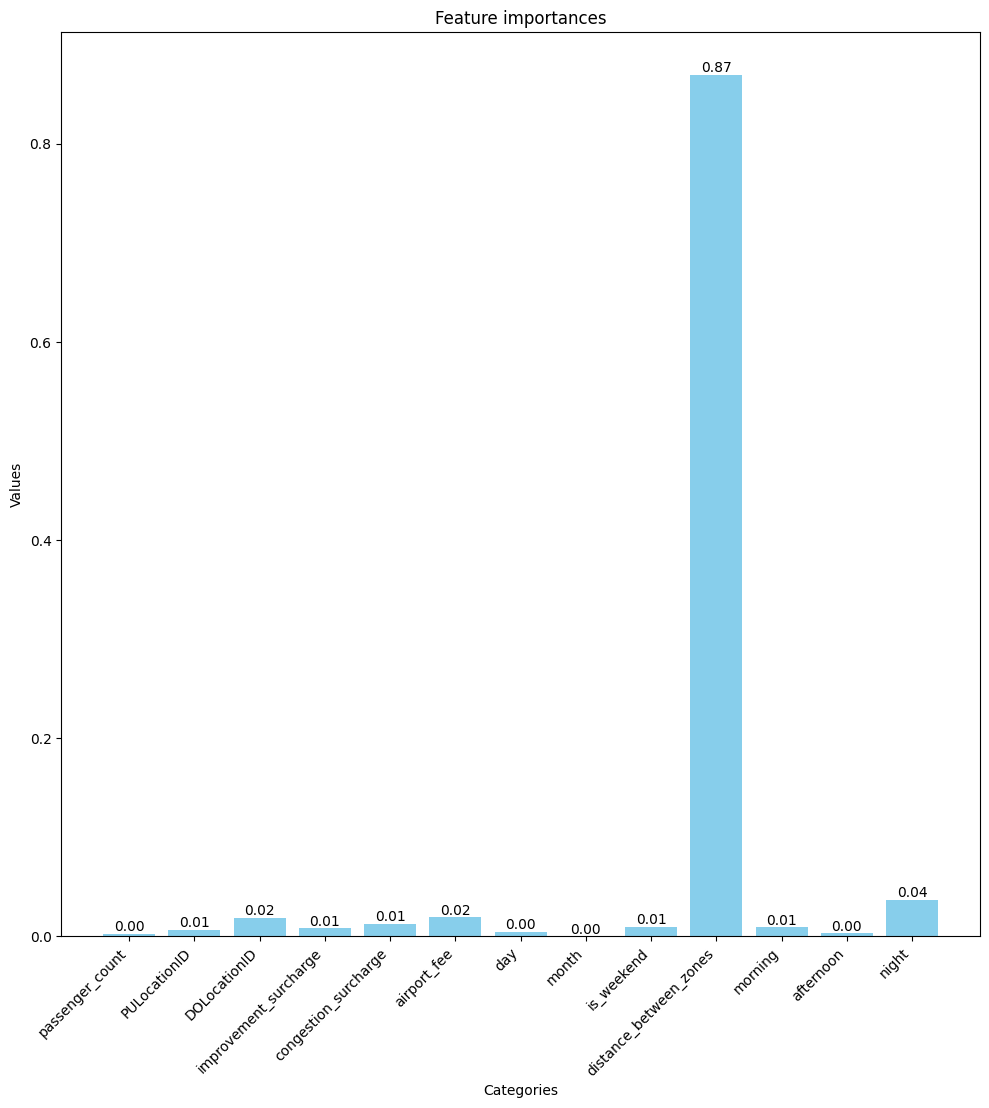

In [13]:
# Feature importances when predicting the fare amount
# bar chart
plt.figure(figsize=(10,10))
fare_bars = plt.bar(column_names_order,xg_fa.feature_importances_,color='skyblue')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Feature importances")
# so everything fits and is readable
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
# to add values on top of each bar
for bar in fare_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, # x position (center of bar)
                yval,                             # y position (top of bar)
                f'{yval:.2f}',                    # Text label (format value)
                va='bottom',                      # Vertical alignment (above bar)
                ha='center') 


plt.show()

In [14]:
# initial run with no finetuning for travel time
# tt = travel time
xg_tt = XGBRegressor(seed=42)
xg_tt.fit(X_train,y_train_travel_time)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
preds_tt = xg_tt.predict(X_val)

In [16]:
# measure our results
r2_travel = r2_score(y_val_travel_time, preds_tt)
mae = mean_absolute_error(y_val_travel_time, preds_tt)
rmse = root_mean_squared_error(y_val_travel_time, preds_tt)
# agregar r2
print(f'R2 score: {r2_travel}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.7800349437480507
Mean Absolute Error: 239.64109551636884
Root Mean Squared Error: 372.56566755866635


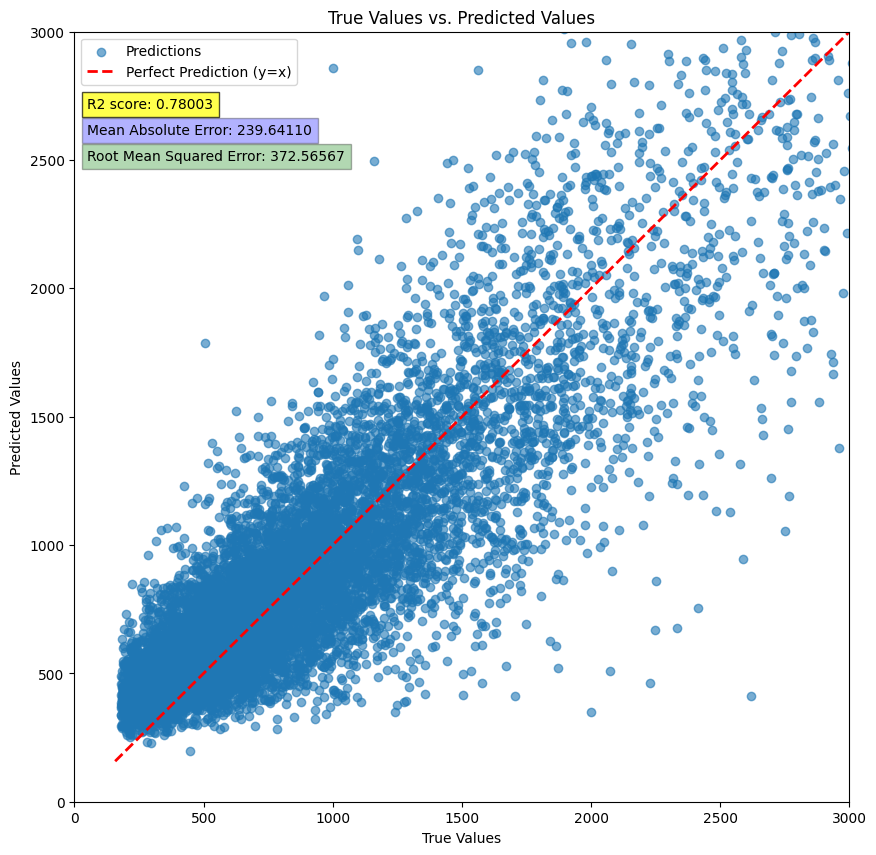

In [17]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_val_travel_time[:10000], preds_tt[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,3000])
plt.ylim([0,3000])
#plotting perfect line
min_val = min(np.min(y_val_travel_time), np.min(preds_tt))
max_val = max(np.max(y_val_travel_time), np.max(preds_tt))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
#plt.grid(True)
plt.legend()
plt.text(50,2700,f'R2 score: {r2_travel:.5f}',bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(50,2600,f'Mean Absolute Error: {mae:.5f}',bbox=dict(facecolor='blue', alpha=0.3))
plt.text(50,2500,f'Root Mean Squared Error: {rmse:.5f}',bbox=dict(facecolor='green', alpha=0.3))
plt.show()

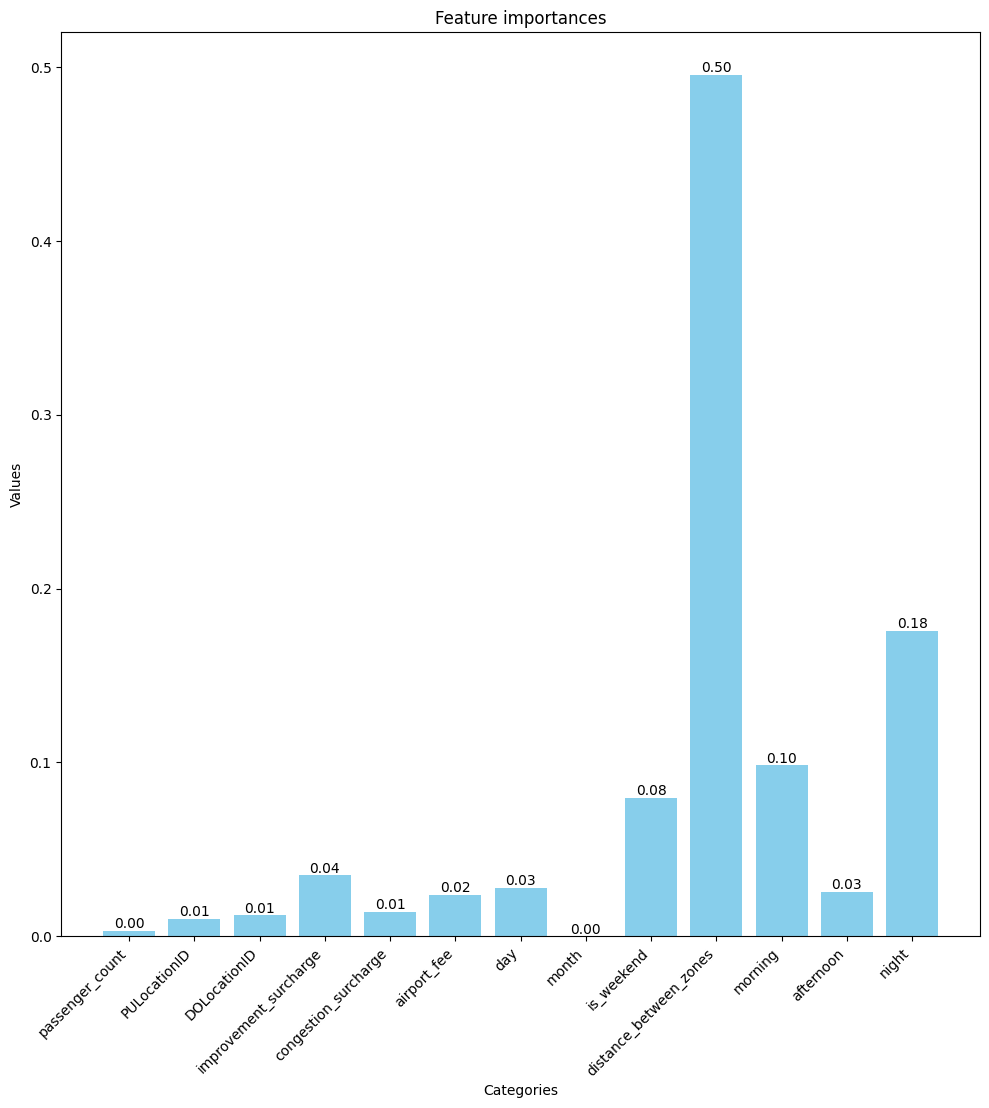

In [18]:
# bar charts for feature importances when predicting the travel time
# bar chart
plt.figure(figsize=(10,10))
fare_bars = plt.bar(column_names_order,xg_tt.feature_importances_,color='skyblue')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Feature importances")
# so everything fits and is readable
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
# to add values on top of each bar
for bar in fare_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, # x position (center of bar)
                yval,                             # y position (top of bar)
                f'{yval:.2f}',                    # Text label (format value)
                va='bottom',                      # Vertical alignment (above bar)
                ha='center') 


plt.show()

**Hyperparameter tuning**

In [42]:
from sklearn.model_selection import RandomizedSearchCV

**Fare amount**

In [ ]:
# we'll start with optimizing the model to predict fare amount
xg_fa_opt = XGBRegressor(n_jobs=-1,random_state=42,tree_method='hist')

# we will choose from the following parameters to perform our cross validation search
xg_params_fa = {'n_estimators':[int(x) for x in np.linspace(start=100,stop=500,num=5)], # 100,200,300...1000
             'max_depth':[int(x) for x in np.linspace(start=10,stop=50,num=5)],
             }

# xg_params_tt = {'n_estimators':[int(x) for x in np.linspace(start=500,stop=1000,num=5)], # 100,200,300...1000
#              #'learning_rate':[x for x in np.linspace(start=0.01,stop=0.3,num=5)],
#              'max_depth':[int(x) for x in np.linspace(start=10,stop=50,num=5)],
#             #  'subsample':[0.25,0.5,0.75,1.0],
#             #  'colsample_bytree':[0.25,0.5,0.75,1.0],
#             #  'gamma':[0.25,0.5,0.75,1.0],
#             #  'alpha':[0,0.1,0.25,0.5,1.0,1.5,2.0],
#             #  'lambda':[1.0,1.5,2.0,2.5,3.0,3.5,4.0],
#             #  'min_child_weight':[1.0,1.5,2.0,2.5,3.0,3.5,4.0],
#              'objective':['reg:squarederror'],
#              'eval_metric':['rmse']
#              }

n_iterations_fa = 20

clf_travel_time = RandomizedSearchCV(estimator=xg_fa_opt,
                                     param_distributions=xg_params_fa,
                                     n_iter=n_iterations_fa,
                                     cv=5,
                                     scoring='neg_root_mean_squared_error',
                                     verbose=3,
                                     n_jobs=-1,
                                     random_state=42)

In [49]:
clf_travel_time.fit(X_train,y_train_fare_amount)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 